In [30]:
# Importing Data handling
import pandas as pd
import numpy as np

# Importing Visualization
import matplotlib.pyplot as plt

# Importing ML & NLP
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [31]:
#Mounting Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [32]:
#Loading Dataset
file_path = '/content/drive/MyDrive/Colab Notebooks/Spam-Email-Classifier/emails.csv'

df = pd.read_csv(file_path, header=None, names=['message', 'label'], usecols=[0, 1])
df.info()
df['label'].value_counts()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5731 entries, 0 to 5730
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   message  5731 non-null   object
 1   label    5729 non-null   object
dtypes: object(2)
memory usage: 89.7+ KB


,message,label
0,text,spam
1,Subject: naturally irresistible your corporate...,1
2,Subject: the stock trading gunslinger fanny i...,1
3,Subject: unbelievable new homes made easy im ...,1
4,Subject: 4 color printing special request add...,1


In [33]:
#Text Cleaning
df = df.iloc[1:].reset_index(drop=True)
# Removing 'Subject:' text
df['message'] = df['message'].str.replace('Subject:', '', regex=False)
df.head()

,message,label
0,naturally irresistible your corporate identit...,1
1,the stock trading gunslinger fanny is merril...,1
2,unbelievable new homes made easy im wanting ...,1
3,4 color printing special request additional ...,1
4,"do not have money , get software cds from her...",1


In [41]:
df['label'] = df['label'].astype(str).str.lower() #Converting to Lowercase
df['label'] = df['label'].map({'spam': 1,'1': 1,'ham': 0,'0': 0}) #Mapping
df = df.dropna(subset=['label'])  #Dropping any unmapped rows
df['label'] = df['label'].astype(int) #Converting to Integer
df['message'] = df['message'].astype(str) #Converting to String
df['label'].value_counts()
df.isnull().sum()

,message,label
0,naturally irresistible your corporate identit...,1
1,the stock trading gunslinger fanny is merril...,1
2,unbelievable new homes made easy im wanting ...,1
3,4 color printing special request additional ...,1
4,"do not have money , get software cds from her...",1


In [35]:
#Training-Testing-Spliting
X = df['message']
y = df['label']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [36]:
#TF-IDF Vectorization
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.9)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [37]:
#Naive Bayes Model
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)

nb_pred = nb_model.predict(X_test_tfidf)

print("Naive Bayes Accuracy:", accuracy_score(y_test, nb_pred))
print(confusion_matrix(y_test, nb_pred))
print(classification_report(y_test, nb_pred))

Naive Bayes Accuracy: 0.9092495636998255
[[872   0]
 [104 170]]
              precision    recall  f1-score   support

           0       0.89      1.00      0.94       872
           1       1.00      0.62      0.77       274

    accuracy                           0.91      1146
   macro avg       0.95      0.81      0.85      1146
weighted avg       0.92      0.91      0.90      1146



In [38]:
#SVM Model
svm_model = LinearSVC()
svm_model.fit(X_train_tfidf, y_train)

svm_pred = svm_model.predict(X_test_tfidf)

print("SVM Accuracy:", accuracy_score(y_test, svm_pred))
print(confusion_matrix(y_test, svm_pred))
print(classification_report(y_test, svm_pred))

SVM Accuracy: 0.9956369982547993
[[870   2]
 [  3 271]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       872
           1       0.99      0.99      0.99       274

    accuracy                           1.00      1146
   macro avg       0.99      0.99      0.99      1146
weighted avg       1.00      1.00      1.00      1146



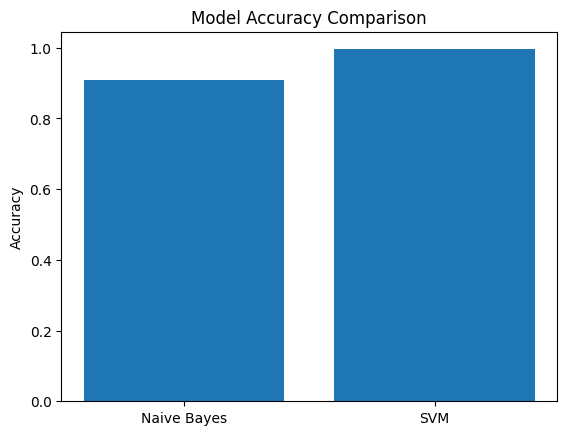

In [39]:
#Accuracy Comparision
models = ['Naive Bayes', 'SVM']
accuracies = [
    accuracy_score(y_test, nb_pred),
    accuracy_score(y_test, svm_pred)
]

plt.bar(models, accuracies)
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.show()

In [40]:
#Testing with custom Email
sample_email = [
    "Meeting update Hi team, the meeting is scheduled for tomorrow at 10 AM."
]

sample_vec = vectorizer.transform(sample_email)

print("Naive Bayes Prediction:", nb_model.predict(sample_vec))
print("SVM Prediction:", svm_model.predict(sample_vec))

Naive Bayes Prediction: [0]
SVM Prediction: [0]
